In [1]:
!pip install pomegranate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.3 MB 8.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pomegranate: filename=pomegranate-0.14.8-cp37-cp37m-linux_x86_64.whl size=15068355 sha256=6cf5f92298b30a693e00b47e751dd3f3f94cf4d8b655e616b80d59350901c346
  Stored in directory: /root/.cache/pip/wheels/24/68/69/0eaab474ef1d65abedcd47de8a38ab21d221d329954d7edd24
Successfully built pomegranate


###Monty Door Problem


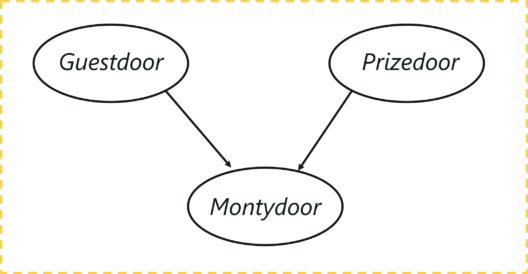

In [2]:
#Import required packages
import math
from pomegranate import *
 
# Initially the door selected by the guest is completely random
guest =DiscreteDistribution( { 'A': 1./3, 'B': 1./3, 'C': 1./3 } )
 
# The door containing the prize is also a random process
prize =DiscreteDistribution( { 'A': 1./3, 'B': 1./3, 'C': 1./3 } )
 
# The door Monty picks, depends on the choice of the guest and the prize door
monty =ConditionalProbabilityTable(
[[ 'A', 'A', 'A', 0.0 ],
[ 'A', 'A', 'B', 0.5 ],
[ 'A', 'A', 'C', 0.5 ],
[ 'A', 'B', 'A', 0.0 ],
[ 'A', 'B', 'B', 0.0 ],
[ 'A', 'B', 'C', 1.0 ],
[ 'A', 'C', 'A', 0.0 ],
[ 'A', 'C', 'B', 1.0 ],
[ 'A', 'C', 'C', 0.0 ],
[ 'B', 'A', 'A', 0.0 ],
[ 'B', 'A', 'B', 0.0 ],
[ 'B', 'A', 'C', 1.0 ],
[ 'B', 'B', 'A', 0.5 ],
[ 'B', 'B', 'B', 0.0 ],
[ 'B', 'B', 'C', 0.5 ],
[ 'B', 'C', 'A', 1.0 ],
[ 'B', 'C', 'B', 0.0 ],
[ 'B', 'C', 'C', 0.0 ],
[ 'C', 'A', 'A', 0.0 ],
[ 'C', 'A', 'B', 1.0 ],
[ 'C', 'A', 'C', 0.0 ],
[ 'C', 'B', 'A', 1.0 ],
[ 'C', 'B', 'B', 0.0 ],
[ 'C', 'B', 'C', 0.0 ],
[ 'C', 'C', 'A', 0.5 ],
[ 'C', 'C', 'B', 0.5 ],
[ 'C', 'C', 'C', 0.0 ]], [guest, prize] )
 
d1 = State( guest, name="guest" )
d2 = State( prize, name="prize" )
d3 = State( monty, name="monty" )
 
#Building the Bayesian Network
network = BayesianNetwork( "Solving the Monty Hall Problem With Bayesian Networks" )
network.add_states(d1, d2, d3)
network.add_edge(d1, d3)
network.add_edge(d2, d3)
network.bake()

In [8]:
beliefs = network.predict_proba({ 'guest' : 'A' })
beliefs = map(str, beliefs)
print("n".join( "{}t{}".format( state.name, belief ) for state, belief in zip( network.states, beliefs ) ))

guesttAnprizet{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "A" : 0.3333333333333333,
            "B" : 0.3333333333333333,
            "C" : 0.3333333333333333
        }
    ],
    "frozen" : false
}nmontyt{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "B" : 0.49999999999999983,
            "A" : 0.0,
            "C" : 0.49999999999999983
        }
    ],
    "frozen" : false
}


In [9]:
beliefs = network.predict_proba({'guest' : 'A', 'monty' : 'B'})
print("n".join( "{}t{}".format( state.name, str(belief) ) for state, belief in zip( network.states, beliefs )))
 

guesttAnprizet{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "A" : 0.3333333333333334,
            "B" : 0.0,
            "C" : 0.6666666666666664
        }
    ],
    "frozen" : false
}nmontytB
